In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
air = pd.read_csv('data/india_air_quality.csv',encoding='cp1252')

c:\users\hanzhi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [166]:
life = pd.read_csv('data/India Life Expectancy.csv',encoding='cp1252')

In [198]:
life

State  Expected_Span  Actual_Span  Male  Female
0     andhra pradesh           68.5        70.25  68.4    72.1
1              assam           63.9        66.20  65.6    66.8
2              bihar           68.1        69.90  69.6    70.2
3       chhattisgarh           64.8        63.60  61.6    65.7
4              delhi           73.2        72.85  71.8    73.9
5            gujarat           68.7        69.50  67.4    71.8
6            haryana           68.6        69.60  68.0    71.4
7   himachal pradesh           71.6        72.30  69.4    75.5
8    jammu & kashmir           73.6        73.50  71.6    76.2
9          jharkhand           66.6        66.15  65.5    66.8
10         karnataka           68.8        71.25  69.0    73.5
11            kerala           74.9        75.10  72.2    79.9
12    madhya pradesh           64.2        66.90  66.5    67.3
13       maharashtra           71.6        72.20  70.8    73.7
14            odisha           65.8        67.95  66.3    69.6
15            punjab           71.6        72.50  71.0    74.2
16         rajasthan           67.7        70.25  68.6    71.9
17        tamil nadu           70.6        71.40  68.5    74.8
18     uttar pradesh           64.1        68.35  67.5    69.2
19       uttarakhand           71.7        71.50  68.5    74.8
20       west bengal           70.2        70.80  69.8    71.9

In [168]:
life.drop(['Rank'],axis=1,inplace=True)

In [171]:
life['State'] = life['State'].str.lower()

In [175]:
life = life.rename(columns = {'Life_Expectancy_at_Birth':'Expected_Span','Avg_Life_Expectancy':'Actual_Span'})

In [112]:
air['year'] = pd.to_numeric(air['date'].str[:4])

In [119]:
air[air['year'] > 2000]#['state','year','location','so2','no2','rspm','spm','pm2_5']

stn_code       sampling_date           state   location  \
826        95.0   January - M012001  andhra pradesh  Hyderabad   
827        95.0  February - M022001  andhra pradesh  Hyderabad   
828        95.0     March - M032001  andhra pradesh  Hyderabad   
829        95.0     April - M042001  andhra pradesh  Hyderabad   
830        95.0       May - M052001  andhra pradesh  Hyderabad   
...         ...                 ...             ...        ...   
435734     SAMP            15-12-15     west bengal   ULUBERIA   
435735     SAMP            18-12-15     west bengal   ULUBERIA   
435736     SAMP            21-12-15     west bengal   ULUBERIA   
435737     SAMP            24-12-15     west bengal   ULUBERIA   
435738     SAMP            29-12-15     west bengal   ULUBERIA   

                                           agency   type   so2   no2   rspm  \
826       Andhra Pradesh  Pollution Control Board    NaN  14.4  78.3    NaN   
827       Andhra Pradesh  Pollution Control Board    NaN  15.6  73.6    NaN   
828       Andhra Pradesh  Pollution Control Board    NaN  14.8  39.8    NaN   
829       Andhra Pradesh  Pollution Control Board    NaN  13.4  37.1    NaN   
830       Andhra Pradesh  Pollution Control Board    NaN  14.1  30.3    NaN   
...                                           ...    ...   ...   ...    ...   
435734  West Bengal State Pollution Control Board  RIRUO  20.0  44.0  148.0   
435735  West Bengal State Pollution Control Board  RIRUO  17.0  44.0  131.0   
435736  West Bengal State Pollution Control Board  RIRUO  18.0  45.0  140.0   
435737  West Bengal State Pollution Control Board  RIRUO  22.0  50.0  143.0   
435738  West Bengal State Pollution Control Board  RIRUO  20.0  46.0  171.0   

          spm        location_monitoring_station  pm2_5        date    year  
826     291.0                                NaN    NaN  2001-01-01  2001.0  
827     340.0                                NaN    NaN  2001-02-01  2001.0  
828     189.0                                NaN    NaN  2001-03-01  2001.0  
829     220.0                                NaN    NaN  2001-04-01  2001.0  
830     183.0                                NaN    NaN  2001-05-01  2001.0  
...       ...                                ...    ...         ...     ...  
435734    NaN  Inside Rampal Industries,ULUBERIA    NaN  2015-12-15  2015.0  
435735    NaN  Inside Rampal Industries,ULUBERIA    NaN  2015-12-18  2015.0  
435736    NaN  Inside Rampal Industries,ULUBERIA    NaN  2015-12-21  2015.0  
435737    NaN  Inside Rampal Industries,ULUBERIA    NaN  2015-12-24  2015.0  
435738    NaN  Inside Rampal Industries,ULUBERIA    NaN  2015-12-29  2015.0  

[415040 rows x 14 columns]

In [26]:
type(air.iloc[1]['spm'])

numpy.float64

In [127]:
air[air['spm'] > 0].head()

stn_code   sampling_date           state   location agency  \
11    150.0  June - M061990  andhra pradesh  hyderabad    NaN   
12    151.0  June - M061990  andhra pradesh  hyderabad    NaN   
13    152.0  June - M061990  andhra pradesh  hyderabad    NaN   
14    150.0  July - M071990  andhra pradesh  hyderabad    NaN   
15    152.0  July - M071990  andhra pradesh  hyderabad    NaN   

                                  type  so2   no2  rspm    spm  \
11  Residential, Rural and other Areas  3.9  14.1   NaN  133.0   
12                     Industrial Area  5.6  11.8   NaN   82.0   
13  Residential, Rural and other Areas  3.3  19.3   NaN  111.0   
14  Residential, Rural and other Areas  3.9   8.2   NaN  118.0   
15  Residential, Rural and other Areas  3.5  12.1   NaN  135.0   

   location_monitoring_station  pm2_5        date    year  
11                         NaN    NaN  1990-06-01  1990.0  
12                         NaN    NaN  1990-06-01  1990.0  
13                         NaN    NaN  1990-06-01  1990.0  
14                         NaN    NaN  1990-07-01  1990.0  
15                         NaN    NaN  1990-07-01  1990.0

In [120]:
air['state'] = air['state'].str.lower()
air['location'] = air['location'].str.lower()

In [159]:
air_avg = air.groupby('state').mean()
air_avg.drop('year',axis = 1, inplace=True)
air_avg.dropna(how = 'all', inplace=True)

In [187]:
air_avg

so2        no2        rspm         spm      pm2_5
state                                                                        
andhra pradesh         7.284845  21.704451   78.182824  200.260378        NaN
arunachal pradesh      3.179104   5.469697   76.629213         NaN        NaN
assam                  6.723263  14.793691   93.724912  153.355386        NaN
bihar                 19.381476  36.575525  123.705176  276.917416        NaN
chandigarh             2.676986  18.619404   96.587079  206.056150        NaN
chhattisgarh          12.846609  24.815961  126.472399  231.290969        NaN
dadra & nagar haveli   8.939587  18.293959   76.536530  170.545024  30.511628
daman & diu            8.192958  16.168926   73.749431  145.681416  27.886364
delhi                  8.737273  53.489147  196.639771  399.402088  95.113208
goa                    6.827913  12.506337   61.212766   67.254193  18.855612
gujarat               16.656343  24.065631   98.244510  191.567930  30.729696
haryana               14.064957  23.428311  149.860537  268.264804        NaN
himachal pradesh       2.667013  13.658688   91.870202  208.575630        NaN
jammu & kashmir        7.180521  12.213181  117.449483  196.221053        NaN
jharkhand             23.485794  43.366341  168.517763  277.940746        NaN
karnataka             10.223099  22.702837   79.371801  168.001743        NaN
kerala                 5.322350  14.421889   50.636064   84.419791        NaN
madhya pradesh        11.587410  18.639596  114.717967  210.067545  65.064565
maharashtra           17.366863  32.115370  101.479608  205.255823        NaN
manipur                3.900000  20.173684   69.815789  158.657895        NaN
meghalaya              8.955908  10.659706   68.988442   78.002445        NaN
mizoram                2.085009   6.682171   42.716466   87.833333        NaN
nagaland               2.059736   8.947265   83.357027  133.311449        NaN
odisha                 5.275874  16.899568   83.619824  167.609844  42.204089
puducherry            11.970639  15.279496   43.418217   95.598188        NaN
punjab                10.628598  28.085846  173.493711  244.918926        NaN
rajasthan              7.665725  30.441008  142.016832  300.735397        NaN
sikkim                19.800000  26.800000   32.000000   75.000000        NaN
tamil nadu            11.315134  21.601202   66.585638  126.729064  29.550441
telangana              5.418609  23.864005   85.043008         NaN  43.968927
uttar pradesh         12.528500  27.610095  176.952308  372.663688        NaN
uttarakhand           24.372957  26.938090  148.978906  306.758923        NaN
uttaranchal           24.697736  27.163019  121.694340  283.335714        NaN
west bengal           12.608766  59.075731  115.039909  233.506524  64.890625

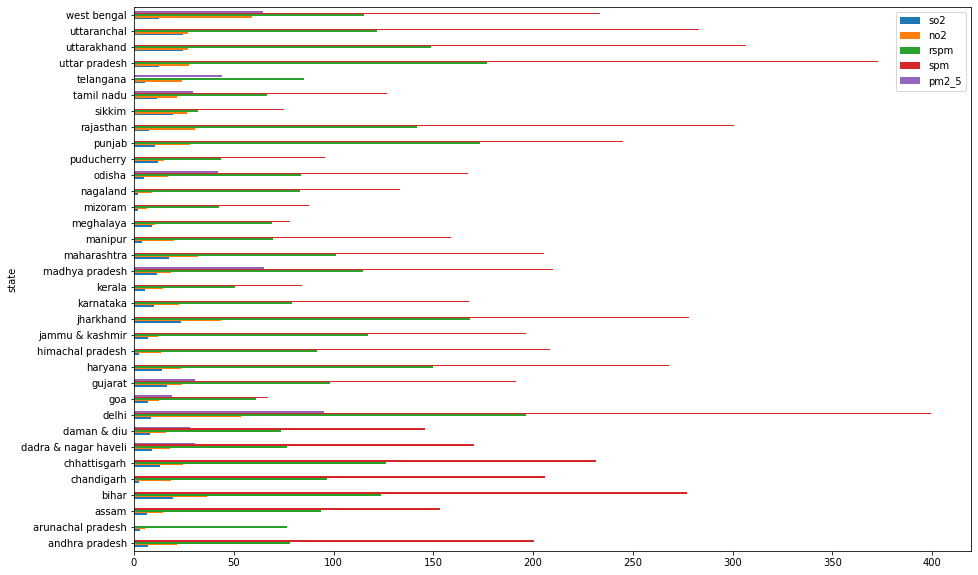

In [241]:
air_avg.plot(kind = 'barh',figsize = (15,10))
plt.savefig('images/state_air_pollution')

In [194]:
life_air_avg = air_avg.merge(life[['State','Actual_Span']], left_on = 'state', right_on = 'State')

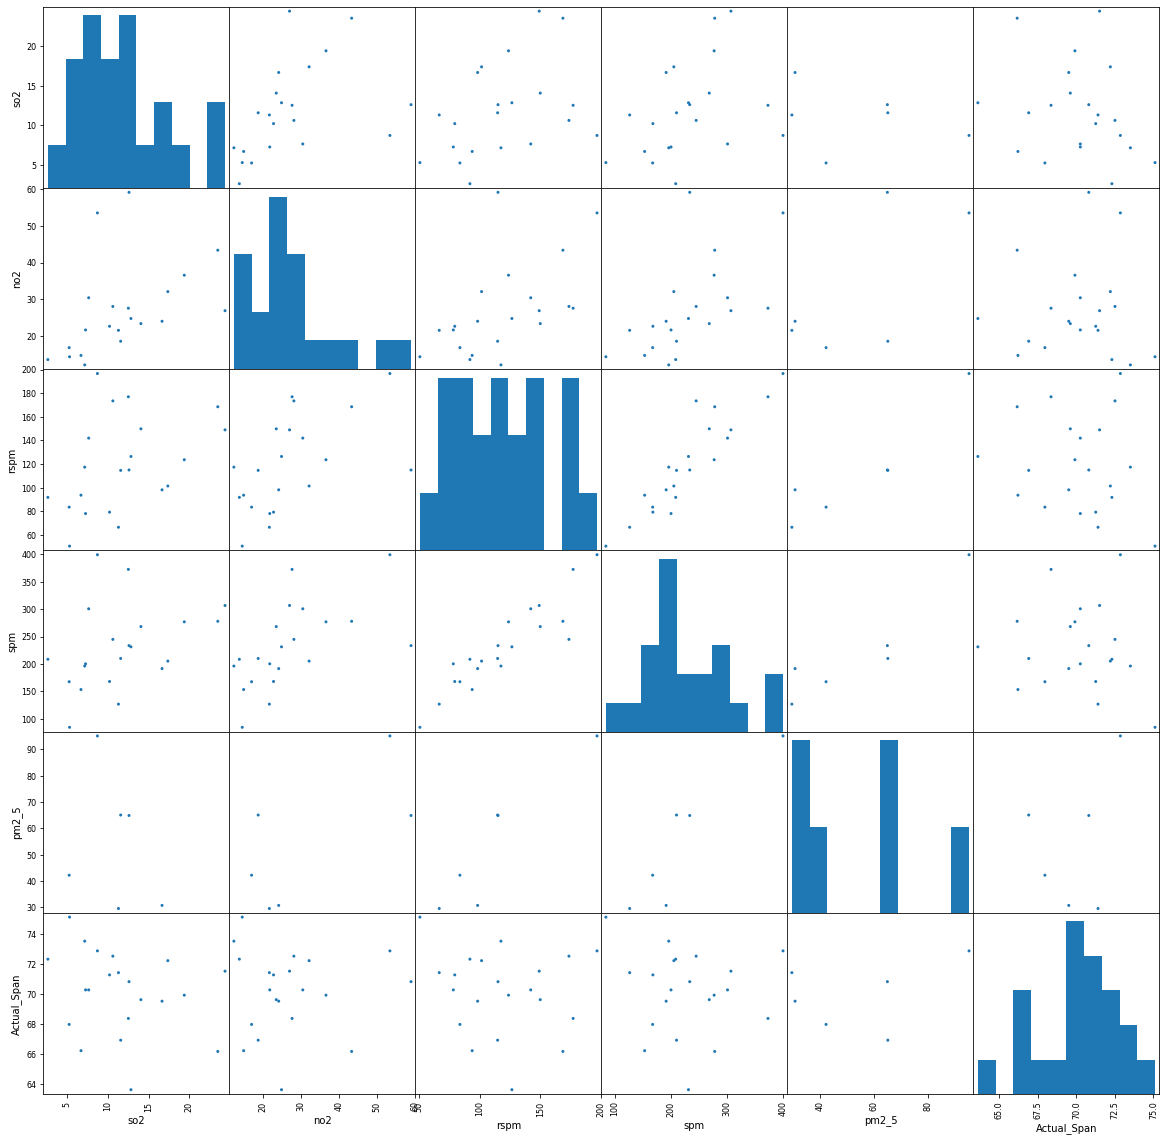

In [240]:
pd.plotting.scatter_matrix(life_air_avg, alpha = 1,figsize = (20,20));
plt.savefig('images/scatter_matrix')

In [205]:
life_air_avg = life_air_avg.set_index('State')

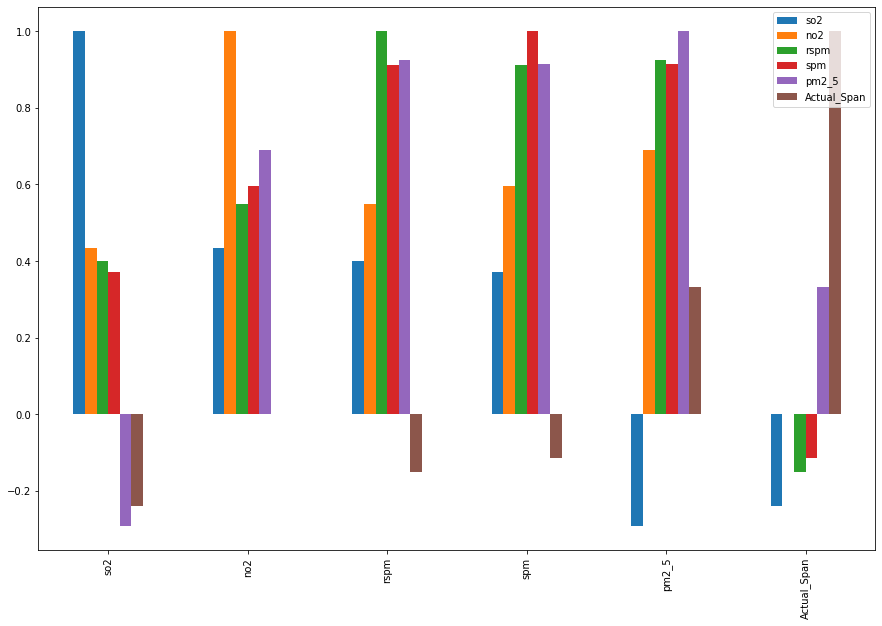

In [239]:
life_air_avg.corr().plot(kind = 'bar',figsize = (15,10))
plt.savefig('images/life_air_corr')

In [206]:
life_air_avg

so2        no2        rspm         spm      pm2_5  \
State                                                                       
andhra pradesh     7.284845  21.704451   78.182824  200.260378        NaN   
assam              6.723263  14.793691   93.724912  153.355386        NaN   
bihar             19.381476  36.575525  123.705176  276.917416        NaN   
chhattisgarh      12.846609  24.815961  126.472399  231.290969        NaN   
delhi              8.737273  53.489147  196.639771  399.402088  95.113208   
gujarat           16.656343  24.065631   98.244510  191.567930  30.729696   
haryana           14.064957  23.428311  149.860537  268.264804        NaN   
himachal pradesh   2.667013  13.658688   91.870202  208.575630        NaN   
jammu & kashmir    7.180521  12.213181  117.449483  196.221053        NaN   
jharkhand         23.485794  43.366341  168.517763  277.940746        NaN   
karnataka         10.223099  22.702837   79.371801  168.001743        NaN   
kerala             5.322350  14.421889   50.636064   84.419791        NaN   
madhya pradesh    11.587410  18.639596  114.717967  210.067545  65.064565   
maharashtra       17.366863  32.115370  101.479608  205.255823        NaN   
odisha             5.275874  16.899568   83.619824  167.609844  42.204089   
punjab            10.628598  28.085846  173.493711  244.918926        NaN   
rajasthan          7.665725  30.441008  142.016832  300.735397        NaN   
tamil nadu        11.315134  21.601202   66.585638  126.729064  29.550441   
uttar pradesh     12.528500  27.610095  176.952308  372.663688        NaN   
uttarakhand       24.372957  26.938090  148.978906  306.758923        NaN   
west bengal       12.608766  59.075731  115.039909  233.506524  64.890625   

                  Actual_Span  
State                          
andhra pradesh          70.25  
assam                   66.20  
bihar                   69.90  
chhattisgarh            63.60  
delhi                   72.85  
gujarat                 69.50  
haryana                 69.60  
himachal pradesh        72.30  
jammu & kashmir         73.50  
jharkhand               66.15  
karnataka               71.25  
kerala                  75.10  
madhya pradesh          66.90  
maharashtra             72.20  
odisha                  67.95  
punjab                  72.50  
rajasthan               70.25  
tamil nadu              71.40  
uttar pradesh           68.35  
uttarakhand             71.50  
west bengal             70.80

In [208]:
life_air_avg.corr()

so2       no2      rspm       spm     pm2_5  Actual_Span
so2          1.000000  0.434234  0.399262  0.370581 -0.291411    -0.241074
no2          0.434234  1.000000  0.549125  0.596464  0.690616    -0.000013
rspm         0.399262  0.549125  1.000000  0.911177  0.926074    -0.152593
spm          0.370581  0.596464  0.911177  1.000000  0.915891    -0.113794
pm2_5       -0.291411  0.690616  0.926074  0.915891  1.000000     0.332107
Actual_Span -0.241074 -0.000013 -0.152593 -0.113794  0.332107     1.000000

In [212]:
life_air_avg.rspm / life_air_avg.pm2_5

State
andhra pradesh           NaN
assam                    NaN
bihar                    NaN
chhattisgarh             NaN
delhi               2.067429
gujarat             3.197054
haryana                  NaN
himachal pradesh         NaN
jammu & kashmir          NaN
jharkhand                NaN
karnataka                NaN
kerala                   NaN
madhya pradesh      1.763140
maharashtra              NaN
odisha              1.981320
punjab                   NaN
rajasthan                NaN
tamil nadu          2.253287
uttar pradesh            NaN
uttarakhand              NaN
west bengal         1.772828
dtype: float64

In [213]:
life_air_avg.spm / life_air_avg.pm2_5

State
andhra pradesh           NaN
assam                    NaN
bihar                    NaN
chhattisgarh             NaN
delhi               4.199228
gujarat             6.233968
haryana                  NaN
himachal pradesh         NaN
jammu & kashmir          NaN
jharkhand                NaN
karnataka                NaN
kerala                   NaN
madhya pradesh      3.228601
maharashtra              NaN
odisha              3.971412
punjab                   NaN
rajasthan                NaN
tamil nadu          4.288568
uttar pradesh            NaN
uttarakhand              NaN
west bengal         3.598463
dtype: float64

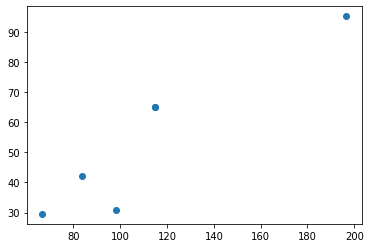

In [218]:
plt.scatter(life_air_avg.rspm , life_air_avg.pm2_5)


In [220]:
air.corr()

so2       no2      rspm       spm     pm2_5      year
so2    1.000000  0.340555  0.165325  0.148325  0.035980 -0.196518
no2    0.340555  1.000000  0.369923  0.326170  0.509357 -0.077676
rspm   0.165325  0.369923  1.000000  0.801752  0.754709 -0.039412
spm    0.148325  0.326170  0.801752  1.000000       NaN -0.030920
pm2_5  0.035980  0.509357  0.754709       NaN  1.000000  0.064030
year  -0.196518 -0.077676 -0.039412 -0.030920  0.064030  1.000000

In [225]:
noNaN = air[['rspm','pm2_5']].dropna().copy()

In [226]:
LR = LinearRegression().fit(noNaN.rspm.values.reshape(-1,1),noNaN.pm2_5)

In [227]:
LR.coef_,LR.intercept_

(array([0.44775662]), -0.42348805644084564)

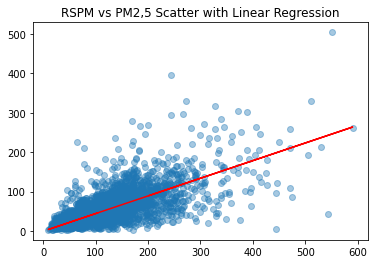

In [237]:
plt.scatter(air.rspm,air.pm2_5, alpha = .4)
plt.plot(noNaN.rspm,noNaN.rspm*LR.coef_+LR.intercept_, color = 'red')
plt.title('RSPM vs PM2,5 Scatter with Linear Regression')
plt.savefig('images/RPSMvsPM2_5LinReg')